In [1]:
import scirpy as ir
import scanpy as sc
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=False, frameon=False, figsize=(4, 4))
%config InlineBackend.figure_format = 'retina'
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

# matplot 输出的图片为illustrator可编辑的字体
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Import data

In [2]:
# import BCR data

P1_crisis = ir.io.read_10x_vdj("./data/Huan filtered BCR/[P1_crisis] filtered_contig_annotations.csv")
P1_after = ir.io.read_10x_vdj("./data/Huan filtered BCR/[P1_after] filtered_contig_annotations.csv") 

P2_crisis = ir.io.read_10x_vdj('./data/Huan filtered BCR/[P2_crisis] filtered_contig_annotations.csv')
P2_after = ir.io.read_10x_vdj('./data/Huan filtered BCR/[P2_after] filtered_contig_annotations.csv')

P1_after.obs['Phenotype']="After_crisis"
P1_after.obs['donor_id']="patient_1"
P1_crisis.obs['Phenotype']="Crisis"
P1_crisis.obs['donor_id']="patient_1"

P2_after.obs['Phenotype']="After_crisis"
P2_after.obs['donor_id']="patient_2"
P2_crisis.obs['Phenotype']="Crisis"
P2_crisis.obs['donor_id']="patient_2"


# merge into one object.
adata_MC_BCR = P1_crisis.concatenate(P1_after, P2_crisis, P2_after)
adata_MC_BCR

c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scirpy\io\_convert_anndata.py:81: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(obs=ir_df, X=np.empty([ir_df.shape[0], 0]))
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scirpy\io\_convert_anndata.py:81: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(obs=ir_df, X=np.empty([ir_df.shape[0], 0]))
c:\Users\Hua\miniconda3\envs\scanpy\lib\site-packages\scirpy\io\_convert_anndata.py:81: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion

AnnData object with n_obs × n_vars = 1878 × 0
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'Phenotype', 'donor_id

In [3]:
adata_MC_BCR.obs = adata_MC_BCR.obs.reset_index()
adata_MC_BCR.obs.index = adata_MC_BCR.obs.cell_id.tolist()
adata_MC_BCR.obs

,cell_id,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,...,IR_VDJ_1_productive,IR_VDJ_2_productive,IR_VJ_1_v_call,IR_VJ_2_v_call,IR_VDJ_1_v_call,IR_VDJ_2_v_call,has_ir,Phenotype,donor_id,batch
AAACGGGCAAGGTTTC-1-0,AAACGGGCAAGGTTTC-1-0,True,True,False,[],IGKC,NaN,IGHD,NaN,1524.0,...,True,None,IGKV1D-39,NaN,IGHV4-34,NaN,True,Crisis,patient_1,0
AAACGGGGTTCTCATT-1-0,AAACGGGGTTCTCATT-1-0,True,True,False,[],IGLC2,NaN,IGHM,NaN,1450.0,...,True,None,IGLV1-47,NaN,IGHV3-43,NaN,True,Crisis,patient_1,0
AAAGATGAGAGAGCTC-1-0,AAAGATGAGAGAGCTC-1-0,True,True,False,[],IGKC,NaN,NaN,NaN,1074.0,...,None,None,IGKV3-20,NaN,NaN,NaN,True,Crisis,patient_1,0
AAAGATGGTTCGAATC-1-0,AAAGATGGTTCGAATC-1-0,True,True,False,[],IGKC,NaN,IGHA2,NaN,55914.0,...,True,None,IGKV3-15,NaN,IGHV3-53,NaN,True,Crisis,patient_1,0
AAAGATGTCTCACATT-1-0,AAAGATGTCTCACATT-1-0,True,True,False,[],IGKC,NaN,IGHM,NaN,1074.0,...,True,None,IGKV1D-39,NaN,IGHV3-21,NaN,True,Crisis,patient_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCATTGAGCT-1-3,TTTGGTTCATTGAGCT-1-3,True,True,False,[],IGLC2,NaN,IGHA1,NaN,6422.0,...,True,None,IGLV3-1,NaN,IGHV4-59,NaN,True,After_crisis,patient_2,3
TTTGGTTGTCGCCATG-1-3,TTTGGTTGTCGCCATG-1-3,True,True,False,[],IGLC2,IGLC2,IGHA1,IGHA2,23760.0,...,True,True,IGLV2-23,IGLV4-69,IGHV3-33,IGHV3-7,True,After_crisis,patient_2,3
TTTGTCAAGCTAAGAT-1-3,TTTGTCAAGCTAAGAT-1-3,True,True,False,[],IGLC3,NaN,IGHA1,NaN,14088.0,...,True,None,IGLV1-47,NaN,IGHV1-2,NaN,True,After_crisis,patient_2,3
TTTGTCACATAAGACA-1-3,TTTGTCACATAAGACA-1-3,True,True,False,[],IGKC,NaN,IGHM,NaN,20422.0,...,True,None,IGKV3-11,NaN,IGHV3-23,NaN,True,After_crisis,patient_2,3


In [4]:
# Modify cell barcodes as indices

test = 'AAACCTGTCGGAATCT-1-0'

def remove_middle_character(s):
    s1 = s[:-3]
    s2 = s[-1]
    return s1+s2

remove_middle_character(test)


adata_MC_BCR.obs.index = adata_MC_BCR.obs.index.map(remove_middle_character)
adata_MC_BCR.obs = adata_MC_BCR.obs.drop('cell_id', axis=1)

adata_MC_BCR.obs

,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,IR_VDJ_1_productive,IR_VDJ_2_productive,IR_VJ_1_v_call,IR_VJ_2_v_call,IR_VDJ_1_v_call,IR_VDJ_2_v_call,has_ir,Phenotype,donor_id,batch
AAACGGGCAAGGTTTC-0,True,True,False,[],IGKC,NaN,IGHD,NaN,1524.0,NaN,...,True,None,IGKV1D-39,NaN,IGHV4-34,NaN,True,Crisis,patient_1,0
AAACGGGGTTCTCATT-0,True,True,False,[],IGLC2,NaN,IGHM,NaN,1450.0,NaN,...,True,None,IGLV1-47,NaN,IGHV3-43,NaN,True,Crisis,patient_1,0
AAAGATGAGAGAGCTC-0,True,True,False,[],IGKC,NaN,NaN,NaN,1074.0,NaN,...,None,None,IGKV3-20,NaN,NaN,NaN,True,Crisis,patient_1,0
AAAGATGGTTCGAATC-0,True,True,False,[],IGKC,NaN,IGHA2,NaN,55914.0,NaN,...,True,None,IGKV3-15,NaN,IGHV3-53,NaN,True,Crisis,patient_1,0
AAAGATGTCTCACATT-0,True,True,False,[],IGKC,NaN,IGHM,NaN,1074.0,NaN,...,True,None,IGKV1D-39,NaN,IGHV3-21,NaN,True,Crisis,patient_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCATTGAGCT-3,True,True,False,[],IGLC2,NaN,IGHA1,NaN,6422.0,NaN,...,True,None,IGLV3-1,NaN,IGHV4-59,NaN,True,After_crisis,patient_2,3
TTTGGTTGTCGCCATG-3,True,True,False,[],IGLC2,IGLC2,IGHA1,IGHA2,23760.0,4084.0,...,True,True,IGLV2-23,IGLV4-69,IGHV3-33,IGHV3-7,True,After_crisis,patient_2,3
TTTGTCAAGCTAAGAT-3,True,True,False,[],IGLC3,NaN,IGHA1,NaN,14088.0,NaN,...,True,None,IGLV1-47,NaN,IGHV1-2,NaN,True,After_crisis,patient_2,3
TTTGTCACATAAGACA-3,True,True,False,[],IGKC,NaN,IGHM,NaN,20422.0,NaN,...,True,None,IGKV3-11,NaN,IGHV3-23,NaN,True,After_crisis,patient_2,3


In [5]:
adata_MC = sc.read('./write/MC_leiden.h5ad')
adata_MC.uns['log1p']["base"] = None
adata_MC

adata_MC_B = adata_MC[adata_MC.obs['Major_category'] == 'B']
subcell_annotator_B = adata_MC_B.obs[['Minor_cluster']]
subcell_annotator_B

,Minor_cluster
AAACGGGCAAGGTTTC-0,Naive B
AAACGGGGTTCTCATT-0,Naive B
AAAGATGGTTCGAATC-0,Plasma cells
AAAGATGTCTCACATT-0,Naive B
AAAGCAATCGCGGATC-0,Naive B
...,...
TTTCCTCTCCTTCAAT-3,Age-associated B
TTTGCGCTCCCTCTTT-3,Naive B
TTTGGTTCATTGAGCT-3,Memory B
TTTGTCACATAAGACA-3,Memory B


In [6]:
adata_MC_BCR.obs['Minor_cluster'] = np.nan
adata_MC_BCR.obs['Minor_cluster'] =  adata_MC_B.obs['Minor_cluster'].combine_first(subcell_annotator_B['Minor_cluster'])
adata_MC_BCR = adata_MC_BCR[adata_MC_BCR.obs['Minor_cluster'].notna()]
adata_MC_BCR.obs

,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,IR_VDJ_2_productive,IR_VJ_1_v_call,IR_VJ_2_v_call,IR_VDJ_1_v_call,IR_VDJ_2_v_call,has_ir,Phenotype,donor_id,batch,Minor_cluster
AAACGGGCAAGGTTTC-0,True,True,False,[],IGKC,NaN,IGHD,NaN,1524.0,NaN,...,None,IGKV1D-39,NaN,IGHV4-34,NaN,True,Crisis,patient_1,0,Naive B
AAACGGGGTTCTCATT-0,True,True,False,[],IGLC2,NaN,IGHM,NaN,1450.0,NaN,...,None,IGLV1-47,NaN,IGHV3-43,NaN,True,Crisis,patient_1,0,Naive B
AAAGATGGTTCGAATC-0,True,True,False,[],IGKC,NaN,IGHA2,NaN,55914.0,NaN,...,None,IGKV3-15,NaN,IGHV3-53,NaN,True,Crisis,patient_1,0,Plasma cells
AAAGATGTCTCACATT-0,True,True,False,[],IGKC,NaN,IGHM,NaN,1074.0,NaN,...,None,IGKV1D-39,NaN,IGHV3-21,NaN,True,Crisis,patient_1,0,Naive B
AAAGCAATCGCGGATC-0,True,True,False,[],IGKC,NaN,IGHM,NaN,2936.0,NaN,...,None,IGKV1-5,NaN,IGHV3-7,NaN,True,Crisis,patient_1,0,Naive B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCTCCTTCAAT-3,True,True,False,[],IGKC,NaN,IGHM,NaN,7702.0,NaN,...,None,IGKV1-9,NaN,IGHV3-33,NaN,True,After_crisis,patient_2,3,Age-associated B
TTTGCGCTCCCTCTTT-3,True,True,False,[],IGKC,NaN,IGHA1,NaN,13370.0,NaN,...,None,IGKV3-11,NaN,IGHV3-15,NaN,True,After_crisis,patient_2,3,Naive B
TTTGGTTCATTGAGCT-3,True,True,False,[],IGLC2,NaN,IGHA1,NaN,6422.0,NaN,...,None,IGLV3-1,NaN,IGHV4-59,NaN,True,After_crisis,patient_2,3,Memory B
TTTGTCACATAAGACA-3,True,True,False,[],IGKC,NaN,IGHM,NaN,20422.0,NaN,...,None,IGKV3-11,NaN,IGHV3-23,NaN,True,After_crisis,patient_2,3,Memory B


In [7]:
adata_MC_BCR.obs["Sample"] = adata_MC_BCR.obs["donor_id"].astype(str) +'_' +adata_MC_BCR.obs["Phenotype"].astype(str)

C:\Users\Hua\AppData\Local\Temp\ipykernel_38520\1793726285.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_MC_BCR.obs["Sample"] = adata_MC_BCR.obs["donor_id"].astype(str) +'_' +adata_MC_BCR.obs["Phenotype"].astype(str)


# TCR Quality Control

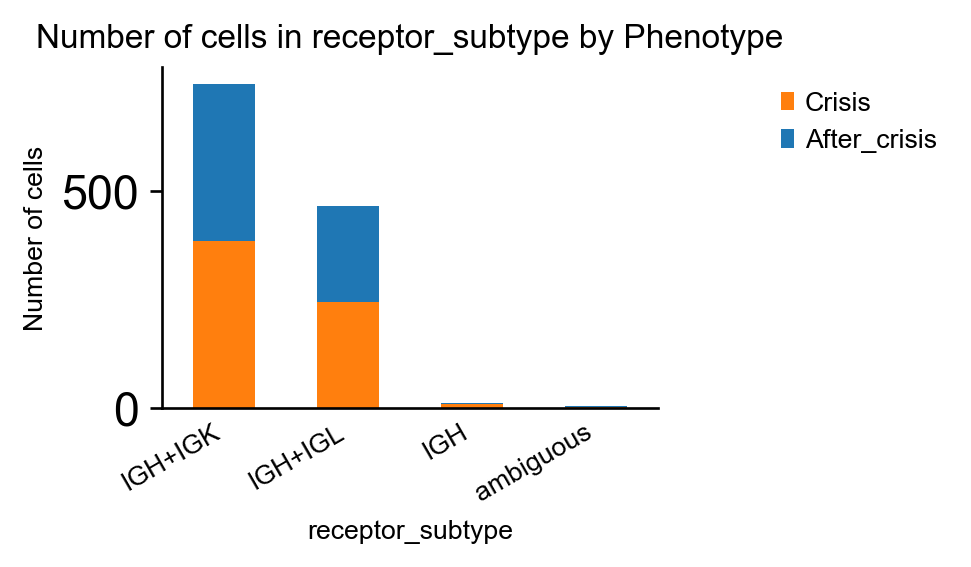

In [8]:
ir.tl.chain_qc(adata_MC_BCR)
ax = ir.pl.group_abundance(adata_MC_BCR, groupby="receptor_subtype", target_col="Phenotype")

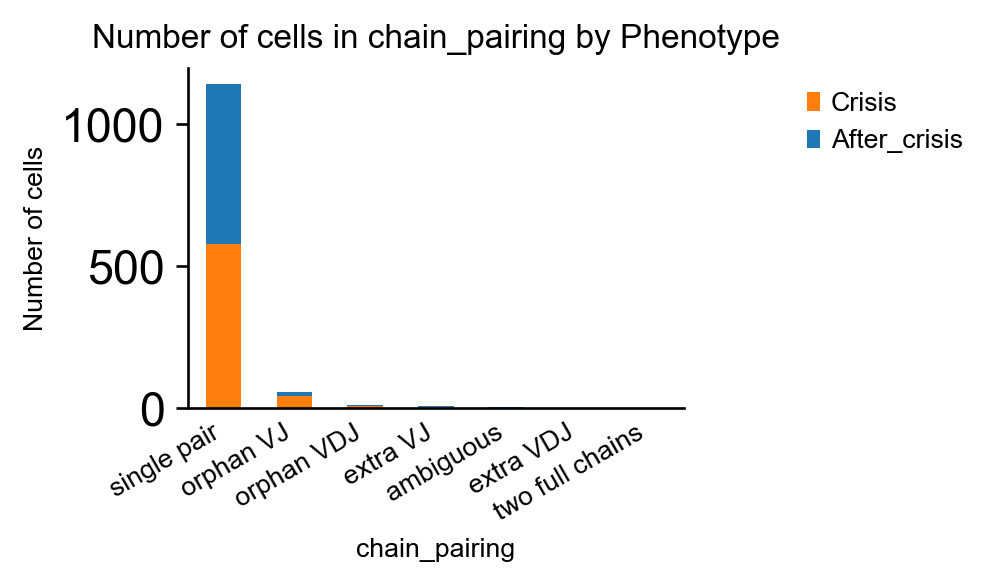

In [9]:
ax = ir.pl.group_abundance(adata_MC_BCR, groupby="chain_pairing", target_col="Phenotype")

In [10]:
adata_MC_BCR = adata_MC_BCR[~adata_MC_BCR.obs["chain_pairing"].isin(["orphan VDJ", "orphan VJ"]), :].copy()
adata_MC_BCR

AnnData object with n_obs × n_vars = 1159 × 0
    obs: 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_junction', 'IR_VDJ_2_junction', 'IR_VJ_1_junction_aa', 'IR_VJ_2_junction_aa', 'IR_VDJ_1_junction_aa', 'IR_VDJ_2_junction_aa', 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_productive', 'IR_VJ_2_productive', 'IR_VDJ_1_productive', 'IR_VDJ_2_productive', 'IR_VJ_1_v_call', 'IR_VJ_2_v_call', 'IR_VDJ_1_v_call', 'IR_VDJ_2_v_call', 'has_ir', 'Phenotype', 'donor_id

meta NOT subset; don't know how to subset; dropped


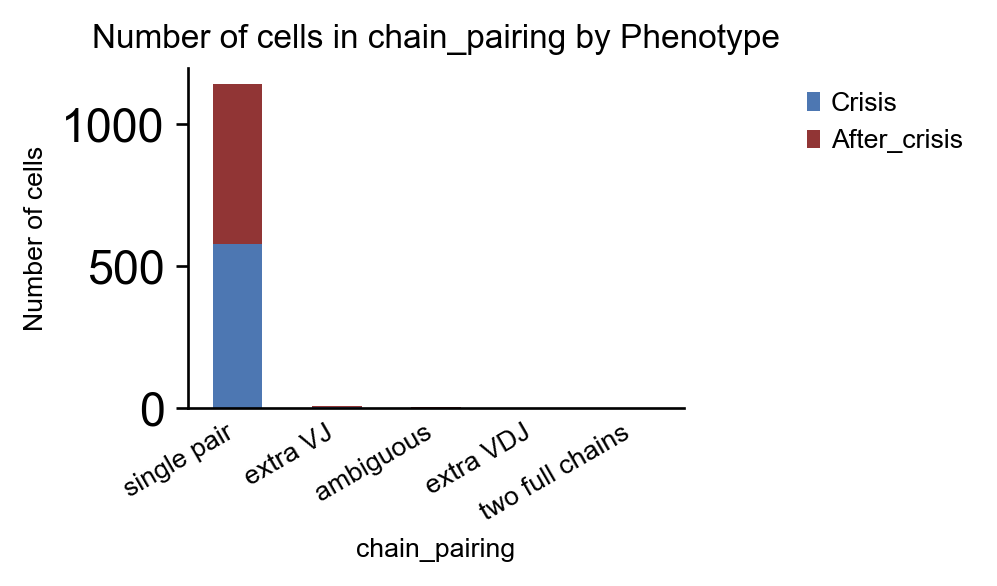

In [11]:
ax = ir.pl.group_abundance(adata_MC_BCR, groupby="chain_pairing", target_col="Phenotype", color=['#4d77b2', '#913535'])
ax.get_figure().savefig("TCR1.pdf")

# Define clonotypes

In [12]:
ir.pp.ir_dist(adata_MC_BCR)
ir.tl.define_clonotypes(adata_MC_BCR, receptor_arms="all", dual_ir="primary_only")

Computing sequence x sequence distance matrix for VJ sequences.
Computing sequence x sequence distance matrix for VDJ sequences.
Initializing lookup tables. 
Computing clonotype x clonotype distances.


100%|██████████| 1117/1117 [00:00<00:00, 1192.75it/s]

Stored clonal assignments in `adata.obs["clone_id"]`.


In [14]:
adata_MC_BCR.obs

,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,Phenotype,donor_id,batch,Minor_cluster,Sample,receptor_type,receptor_subtype,chain_pairing,clone_id,clone_id_size
AAACGGGCAAGGTTTC-0,True,True,False,[],IGKC,NaN,IGHD,NaN,1524.0,NaN,...,Crisis,patient_1,0,Naive B,patient_1_Crisis,BCR,IGH+IGK,single pair,0,1
AAACGGGGTTCTCATT-0,True,True,False,[],IGLC2,NaN,IGHM,NaN,1450.0,NaN,...,Crisis,patient_1,0,Naive B,patient_1_Crisis,BCR,IGH+IGL,single pair,1,1
AAAGATGGTTCGAATC-0,True,True,False,[],IGKC,NaN,IGHA2,NaN,55914.0,NaN,...,Crisis,patient_1,0,Plasma cells,patient_1_Crisis,BCR,IGH+IGK,single pair,2,1
AAAGATGTCTCACATT-0,True,True,False,[],IGKC,NaN,IGHM,NaN,1074.0,NaN,...,Crisis,patient_1,0,Naive B,patient_1_Crisis,BCR,IGH+IGK,single pair,3,1
AAAGCAATCGCGGATC-0,True,True,False,[],IGKC,NaN,IGHM,NaN,2936.0,NaN,...,Crisis,patient_1,0,Naive B,patient_1_Crisis,BCR,IGH+IGK,single pair,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCTCCTTCAAT-3,True,True,False,[],IGKC,NaN,IGHM,NaN,7702.0,NaN,...,After_crisis,patient_2,3,Age-associated B,patient_2_After_crisis,BCR,IGH+IGK,single pair,1112,1
TTTGCGCTCCCTCTTT-3,True,True,False,[],IGKC,NaN,IGHA1,NaN,13370.0,NaN,...,After_crisis,patient_2,3,Naive B,patient_2_After_crisis,BCR,IGH+IGK,single pair,1113,1
TTTGGTTCATTGAGCT-3,True,True,False,[],IGLC2,NaN,IGHA1,NaN,6422.0,NaN,...,After_crisis,patient_2,3,Memory B,patient_2_After_crisis,BCR,IGH+IGL,single pair,1114,1
TTTGTCACATAAGACA-3,True,True,False,[],IGKC,NaN,IGHM,NaN,20422.0,NaN,...,After_crisis,patient_2,3,Memory B,patient_2_After_crisis,BCR,IGH+IGK,single pair,1115,1


<AxesSubplot: >

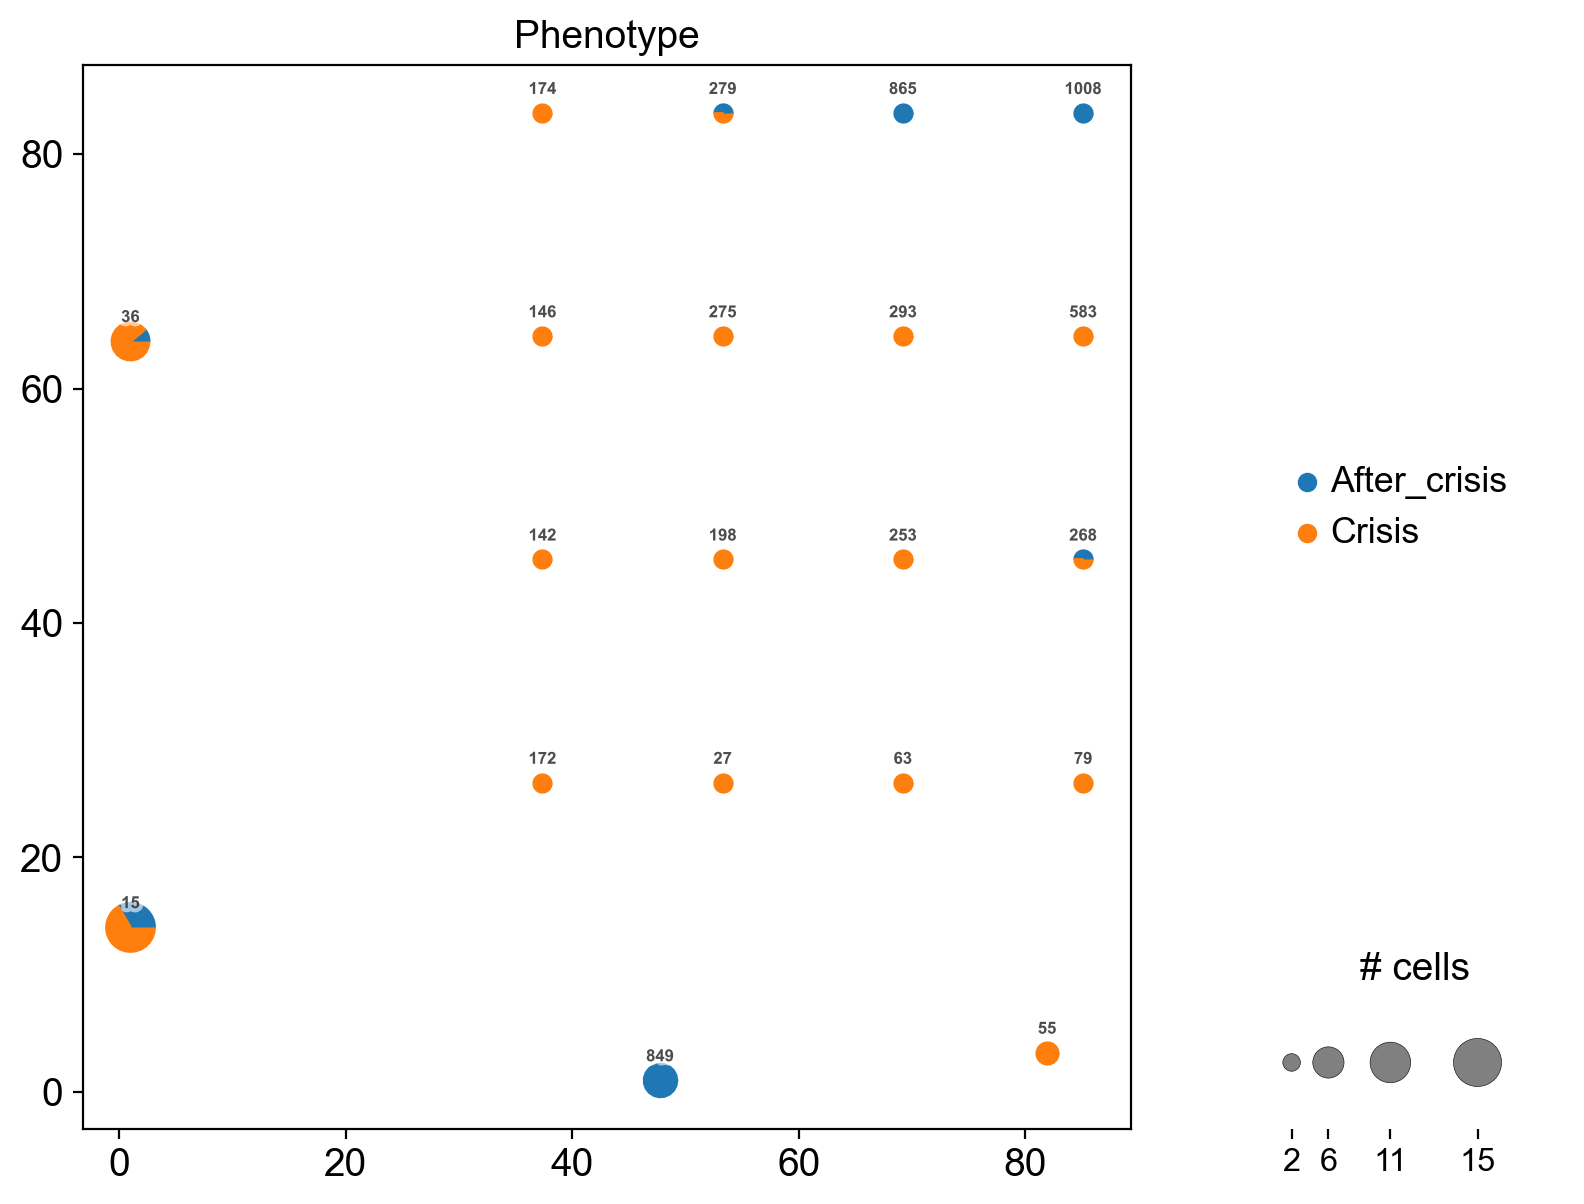

In [14]:
ir.tl.clonotype_network(adata_MC_BCR, min_cells=2)

ir.pl.clonotype_network(
    adata_MC_BCR, color="Phenotype", base_size=20, label_fontsize=6, panel_size=(7, 7)
)

## Top 3 expending clonotypes

In [25]:
adata_MC_BCR_top = adata_MC_BCR[adata_MC_BCR.obs["clone_id"].isin(['15', '36'])].obs
adata_MC_BCR_top.to_csv('./write/adata_MC_BCR_top.csv')

meta NOT subset; don't know how to subset; dropped


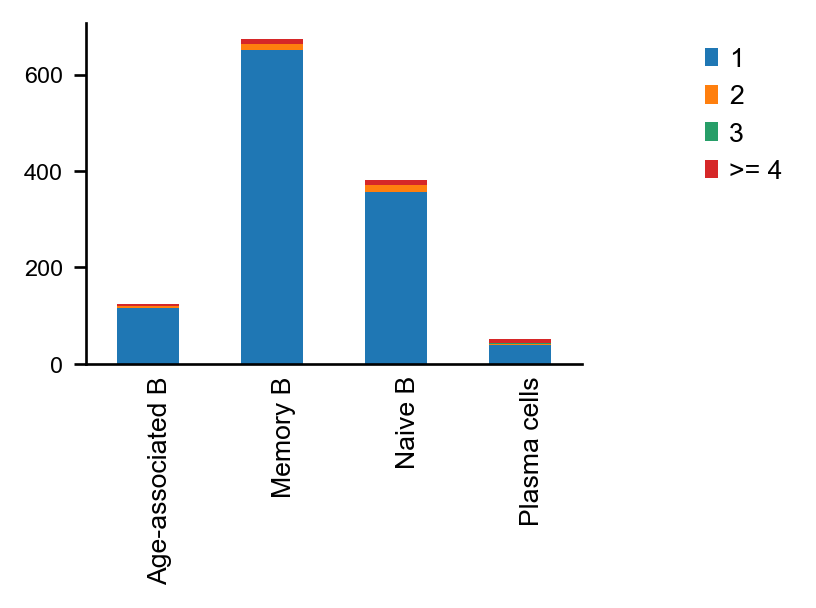

In [16]:
from matplotlib import pyplot as plt

sc.set_figure_params(dpi=200, color_map = 'viridis_r', figsize= [5, 5], fontsize=7, transparent=False, frameon=False)
ir.pl.clonal_expansion(adata_MC_BCR, groupby="Minor_cluster", clip_at=4, normalize=False)
plt.xticks(rotation = 90, rotation_mode = 'anchor', ha = 'right')
plt.savefig('TCR2.pdf')

meta NOT subset; don't know how to subset; dropped


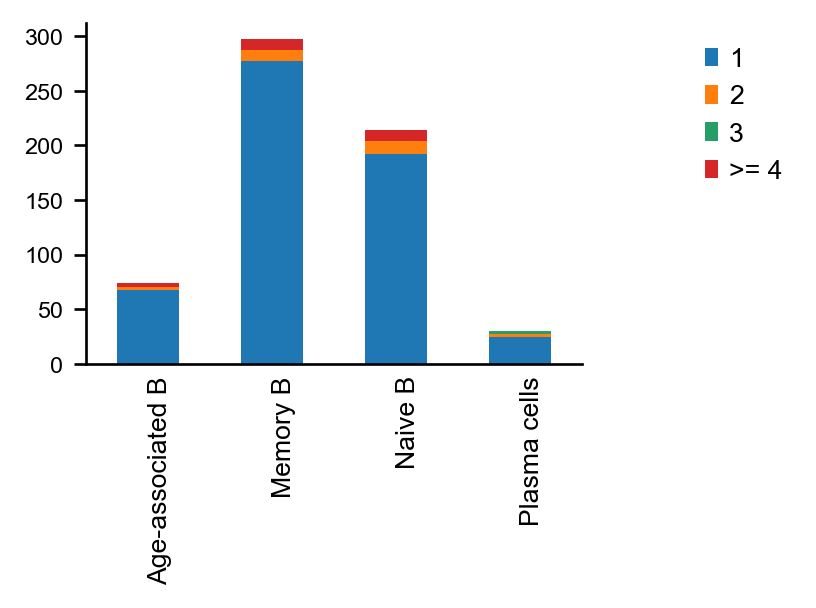

In [18]:
from matplotlib import pyplot as plt

adata_MC_BCR_P1 = adata_MC_BCR[adata_MC_BCR.obs['donor_id'] == 'patient_1']

sc.set_figure_params(dpi=200, color_map = 'viridis_r', figsize= [5, 5], fontsize=7, transparent=False, frameon=False)
ir.pl.clonal_expansion(adata_MC_BCR_P1, groupby="Minor_cluster", clip_at=4, normalize=False)
plt.xticks(rotation = 90, rotation_mode = 'anchor', ha = 'right')
plt.savefig('TCR2.pdf')

meta NOT subset; don't know how to subset; dropped


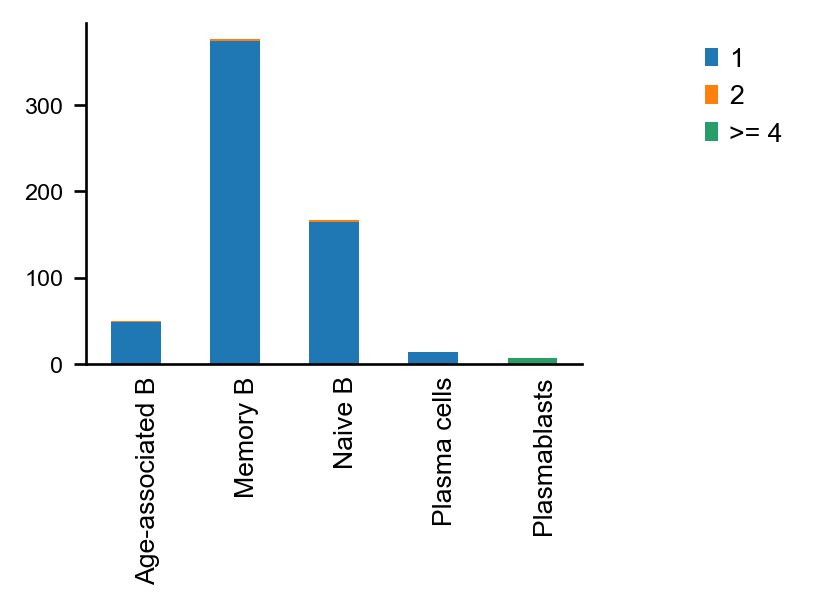

In [19]:
from matplotlib import pyplot as plt

adata_MC_BCR_P2 = adata_MC_BCR[adata_MC_BCR.obs['donor_id'] == 'patient_2']

sc.set_figure_params(dpi=200, color_map = 'viridis_r', figsize= [5, 5], fontsize=7, transparent=False, frameon=False)
ir.pl.clonal_expansion(adata_MC_BCR_P2, groupby="Minor_cluster", clip_at=4, normalize=False)
plt.xticks(rotation = 90, rotation_mode = 'anchor', ha = 'right')
plt.savefig('TCR2.pdf')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Age-associated B'),
  Text(1, 0, 'Memory B'),
  Text(2, 0, 'Naive B'),
  Text(3, 0, 'Plasma cells'),
  Text(4, 0, 'Plasmablasts')])

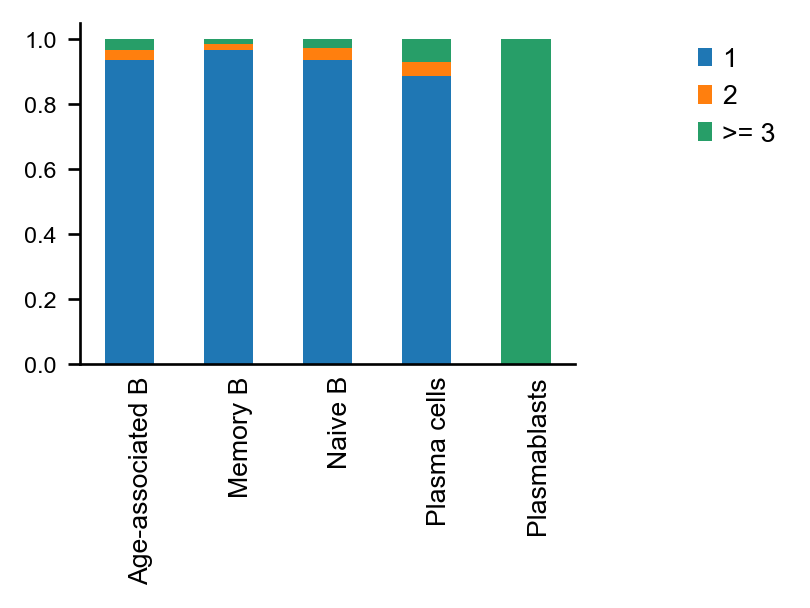

In [20]:
ir.pl.clonal_expansion(adata_MC_BCR, "Minor_cluster")
plt.xticks(rotation = 90, rotation_mode = 'anchor', ha = 'right')

# Clonotype abundance

meta NOT subset; don't know how to subset; dropped


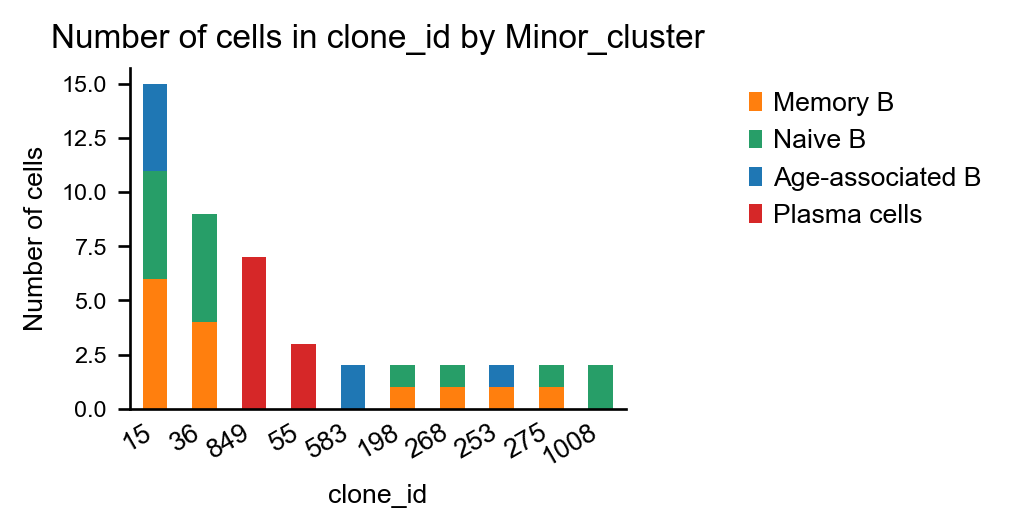

In [17]:
ir.pl.group_abundance(adata_MC_BCR, groupby="clone_id", target_col="Minor_cluster", max_cols=10)
plt.savefig('TCR4.pdf')

<AxesSubplot: title={'center': 'Fraction of Minor_cluster in each clone_id'}, xlabel='clone_id', ylabel='Fraction of cells in Sample'>

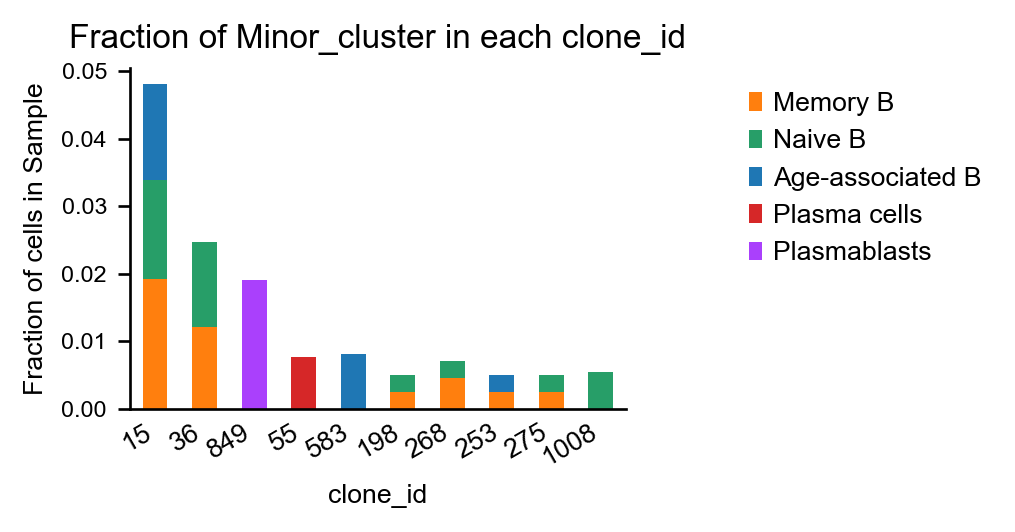

In [22]:
ir.pl.group_abundance(
    adata_MC_BCR, groupby="clone_id", target_col="Minor_cluster", max_cols=10, normalize="Sample"
)

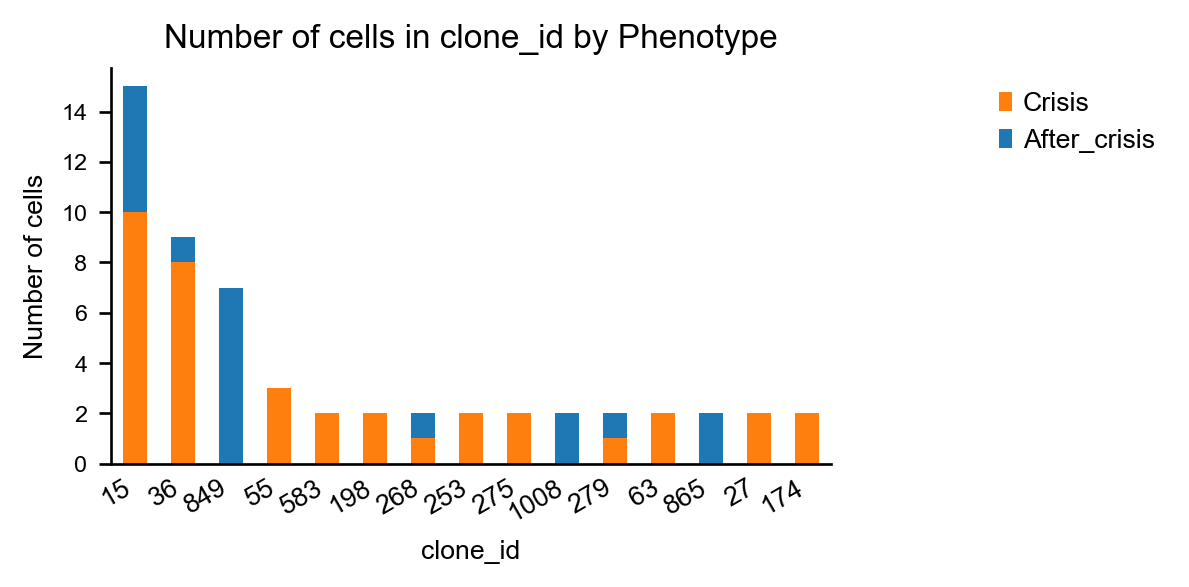

In [23]:
ax = ir.pl.group_abundance(
    adata_MC_BCR, groupby="clone_id", target_col="Phenotype", max_cols=15, figsize=(5, 3)
)

In [18]:
df = sc.get.obs_df(adata_MC_BCR, ['Minor_cluster','Phenotype', 'clone_id', 'clone_id_size'], use_raw=False)
df

,Minor_cluster,Phenotype,clone_id,clone_id_size
AAACGGGCAAGGTTTC-0,Naive B,Crisis,0,1
AAACGGGGTTCTCATT-0,Naive B,Crisis,1,1
AAAGATGGTTCGAATC-0,Plasma cells,Crisis,2,1
AAAGATGTCTCACATT-0,Naive B,Crisis,3,1
AAAGCAATCGCGGATC-0,Naive B,Crisis,4,1
...,...,...,...,...
TTTCCTCTCCTTCAAT-3,Age-associated B,After_crisis,1178,1
TTTGCGCTCCCTCTTT-3,Naive B,After_crisis,1179,1
TTTGGTTCATTGAGCT-3,Memory B,After_crisis,1180,1
TTTGTCACATAAGACA-3,Memory B,After_crisis,1181,1


In [46]:
df[(df['Minor_cluster'] == 'Activated Treg') & (df['Phenotype'] == 'After_crisis')]['clone_id'].unique()

['654', '687', '755', '767', '823', ..., '4459', '4500', '4565', '4592', '4595']
Length: 71
Categories (4598, object): ['0', '1', '2', '3', ..., '4594', '4595', '4596', '4597']

In [19]:
df_clone_unique = df.groupby(['Minor_cluster','Phenotype'])['clone_id'].nunique().reset_index()
df_clone_unique

,Minor_cluster,Phenotype,clone_id
0,Age-associated B,After_crisis,55
1,Age-associated B,Crisis,66
2,Memory B,After_crisis,352
3,Memory B,Crisis,314
4,Naive B,After_crisis,161
5,Naive B,Crisis,209
6,Plasma cells,After_crisis,9
7,Plasma cells,Crisis,33


meta NOT subset; don't know how to subset; dropped


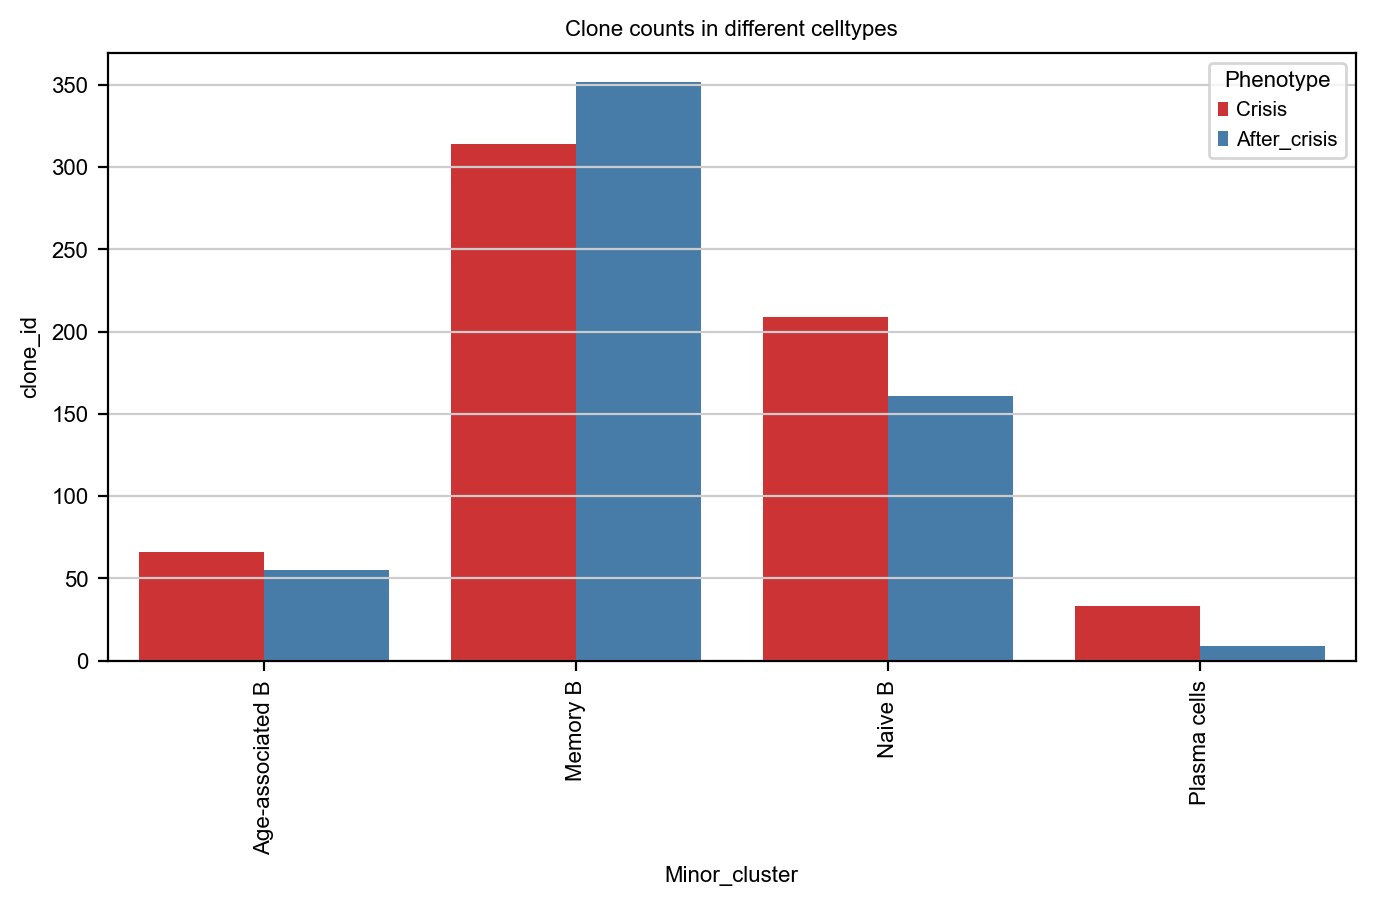

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=True, frameon=False, fontsize=8, figsize= [8, 4])


#sns.barplot(data=df2[(df2['variable'] == 'SRSF1') & (df2['Donor'] == 'patient_3') ], x="Minor_cluster", y="value", hue="Phenotype", errwidth=0.7)
sns.barplot(data=df_clone_unique, x="Minor_cluster", y="clone_id", hue="Phenotype", errwidth=0.7, hue_order= ['Crisis', 'After_crisis'],  palette="Set1").set(title='Clone counts in different celltypes')
plt.xticks(rotation=90)

plt.savefig('./figs/TCR3.pdf')

In [27]:
df = sc.get.obs_df(adata_MC_BCR, ['Minor_cluster','Phenotype', 'donor_id', 'clone_id', 'clone_id_size'], use_raw=False)
df_clone_unique_bypatient = df.groupby(['Minor_cluster','Phenotype', 'donor_id'])['clone_id'].nunique().reset_index()
df_clone_unique_bypatient

,Minor_cluster,Phenotype,donor_id,clone_id
0,Age-associated B,After_crisis,patient_1,42
1,Age-associated B,After_crisis,patient_2,13
2,Age-associated B,Crisis,patient_1,30
3,Age-associated B,Crisis,patient_2,36
4,Memory B,After_crisis,patient_1,166
5,Memory B,After_crisis,patient_2,186
6,Memory B,Crisis,patient_1,125
7,Memory B,Crisis,patient_2,189
8,Naive B,After_crisis,patient_1,7
9,Naive B,After_crisis,patient_2,154


meta NOT subset; don't know how to subset; dropped


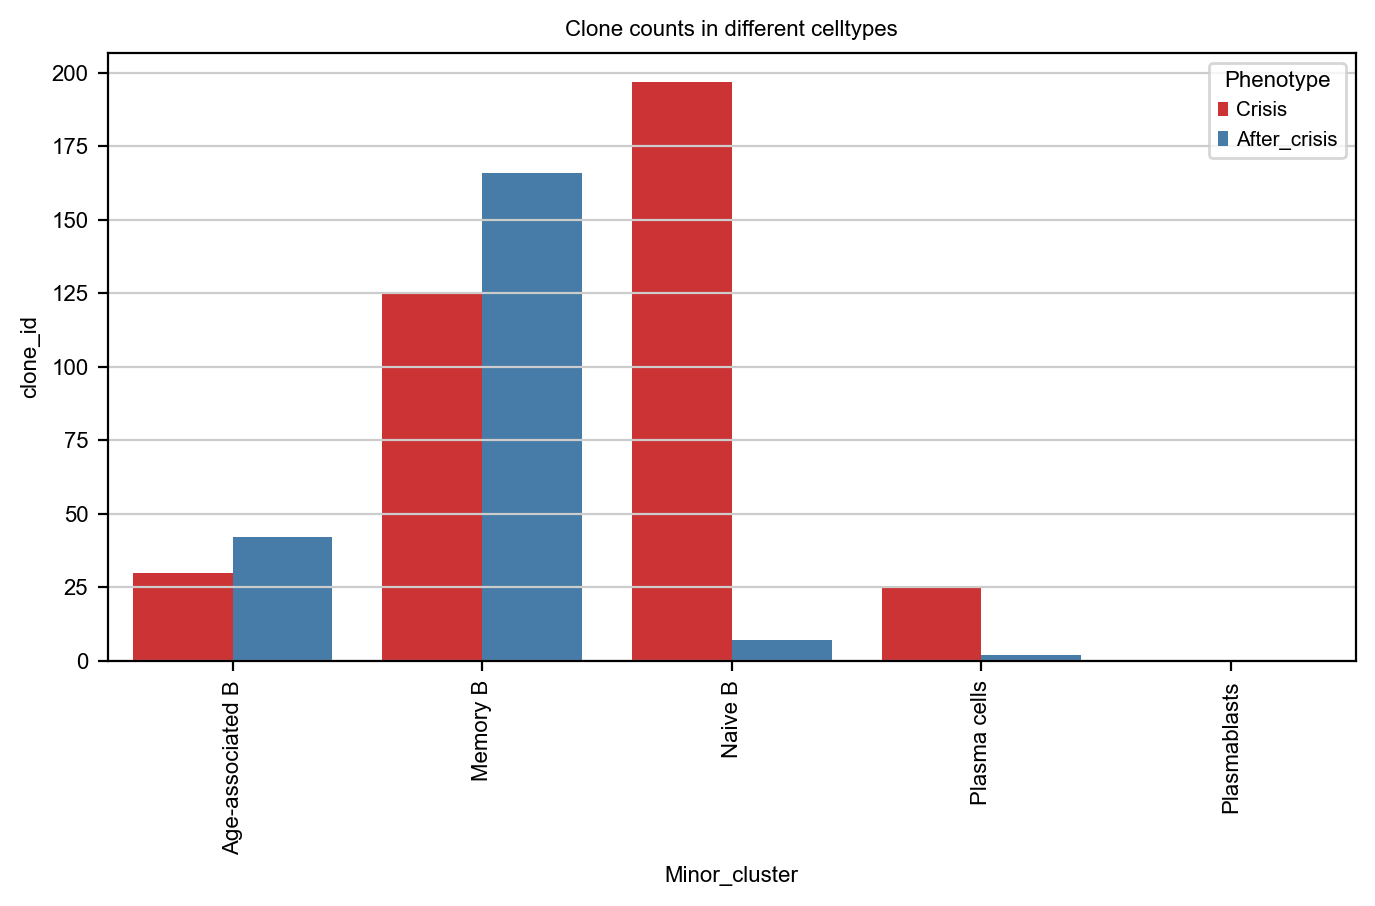

In [28]:
# Patient 1
import seaborn as sns
import matplotlib.pyplot as plt
sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=True, frameon=False, fontsize=8, figsize= [8, 4])

df_clone_unique_P1 = df_clone_unique_bypatient[df_clone_unique_bypatient['donor_id'] == 'patient_1']

#sns.barplot(data=df2[(df2['variable'] == 'SRSF1') & (df2['Donor'] == 'patient_3') ], x="Minor_cluster", y="value", hue="Phenotype", errwidth=0.7)
sns.barplot(data=df_clone_unique_P1, x="Minor_cluster", y="clone_id", hue="Phenotype", errwidth=0.7, hue_order= ['Crisis', 'After_crisis'],  palette="Set1").set(title='Clone counts in different celltypes')
plt.xticks(rotation=90)

plt.savefig('TCR3.pdf')

meta NOT subset; don't know how to subset; dropped


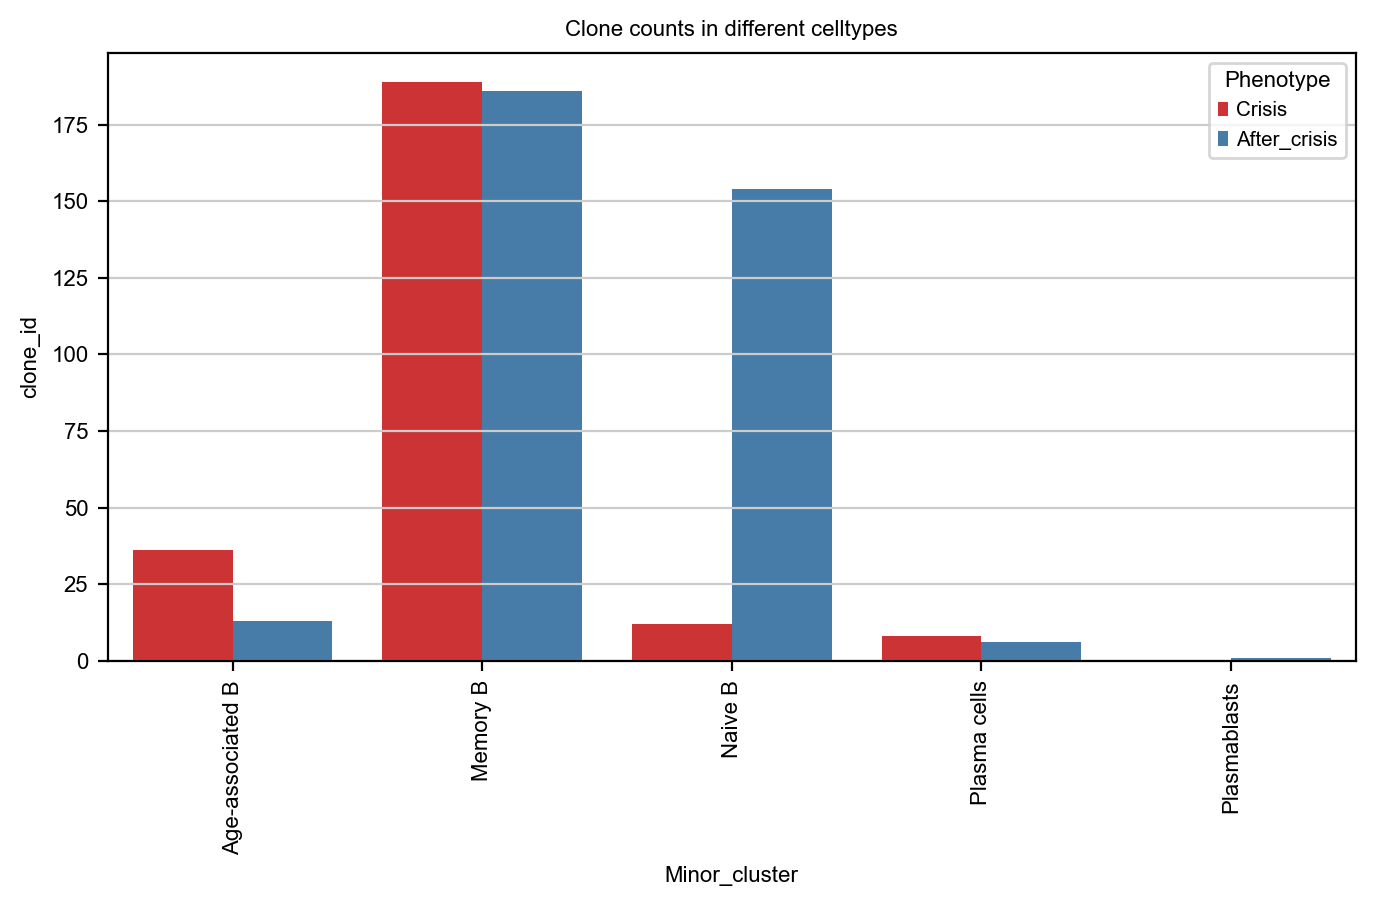

In [29]:
# Patient 2
import seaborn as sns
import matplotlib.pyplot as plt
sc.set_figure_params(dpi=100, color_map = 'viridis_r', transparent=True, frameon=False, fontsize=8, figsize= [8, 4])

df_clone_unique_P2 = df_clone_unique_bypatient[df_clone_unique_bypatient['donor_id'] == 'patient_2']


#sns.barplot(data=df2[(df2['variable'] == 'SRSF1') & (df2['Donor'] == 'patient_3') ], x="Minor_cluster", y="value", hue="Phenotype", errwidth=0.7)
sns.barplot(data=df_clone_unique_P2, x="Minor_cluster", y="clone_id", hue="Phenotype", errwidth=0.7, hue_order= ['Crisis', 'After_crisis'],  palette="Set1").set(title='Clone counts in different celltypes')
plt.xticks(rotation=90)

plt.savefig('TCR3.pdf')

## None clone_id was present in all samples

In [30]:
adata_MC_TCR.obs.Sample.unique()

['patient_1_Crisis', 'patient_1_After_crisis', 'patient_2_Crisis', 'patient_2_After_crisis']
Categories (4, object): ['patient_1_After_crisis', 'patient_1_Crisis', 'patient_2_After_crisis', 'patient_2_Crisis']

In [32]:
samples = ['patient_1_After_crisis', 'patient_2_After_crisis', 'patient_1_Crisis',  'patient_2_Crisis', ]

def present_in_all_samples(group):
    return set(group['Sample'].unique()) == set(samples)

adata_MC_BCR_intersect = adata_MC_BCR.obs.groupby('clone_id').filter(present_in_all_samples)
adata_MC_BCR_intersect


,is_cell,high_confidence,multi_chain,extra_chains,IR_VJ_1_c_call,IR_VJ_2_c_call,IR_VDJ_1_c_call,IR_VDJ_2_c_call,IR_VJ_1_consensus_count,IR_VJ_2_consensus_count,...,Phenotype,donor_id,batch,Minor_cluster,Sample,receptor_type,receptor_subtype,chain_pairing,clone_id,clone_id_size


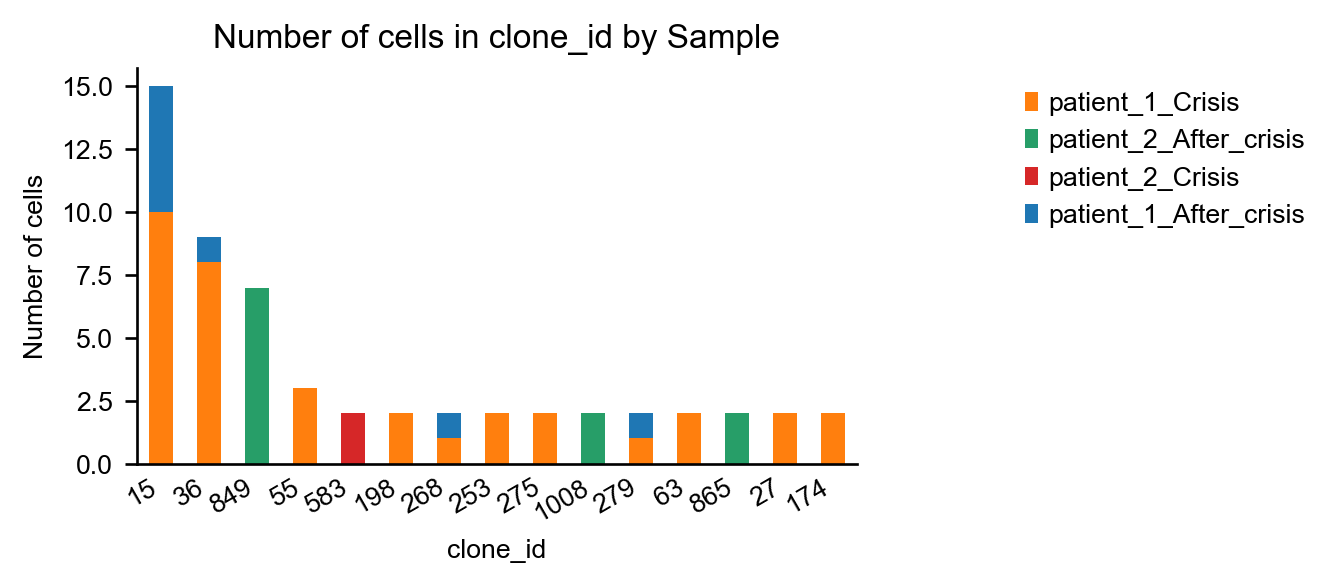

In [33]:
ax = ir.pl.group_abundance(
    adata_MC_BCR, groupby="clone_id", target_col="Sample", max_cols=15, figsize=(5, 3)
)

# Gene usage

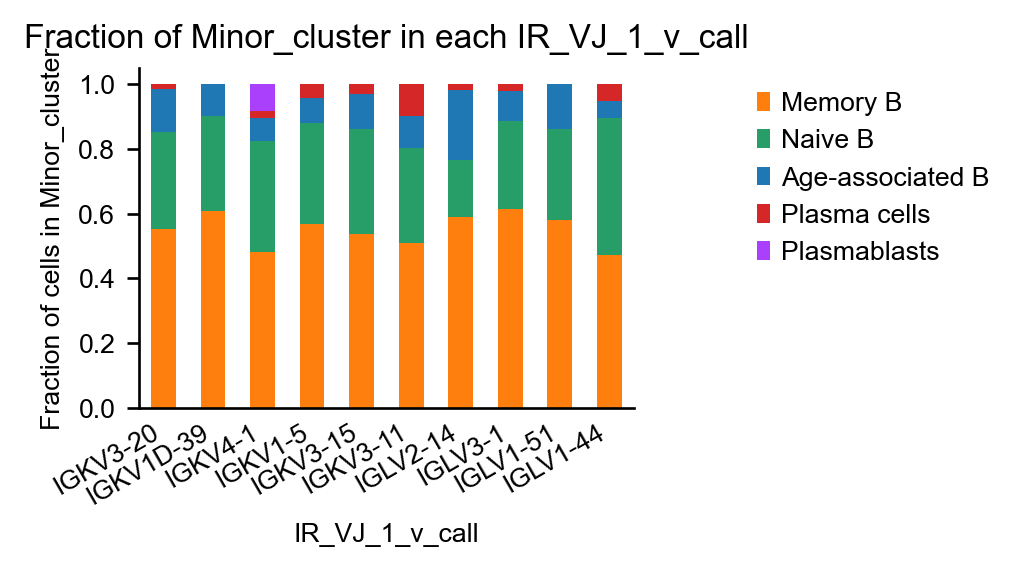

In [34]:
ax = ir.pl.group_abundance(
    adata_MC_BCR, groupby="IR_VJ_1_v_call", target_col="Minor_cluster", normalize=True, max_cols=10
)

meta NOT subset; don't know how to subset; dropped


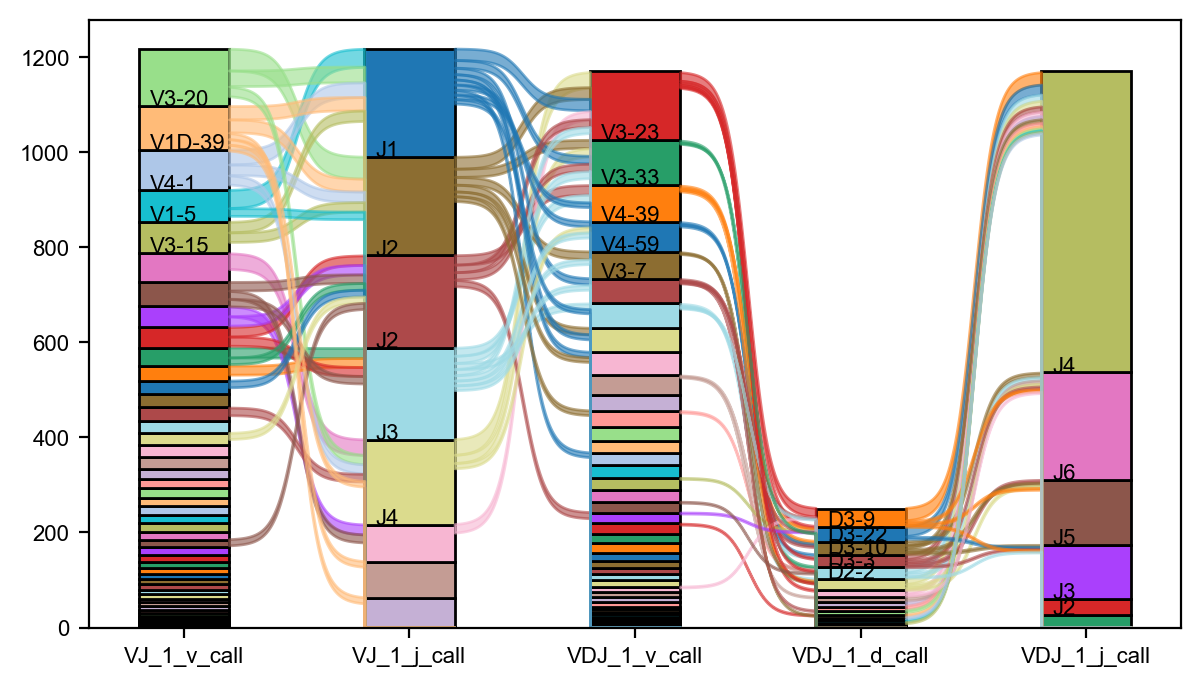

In [22]:
ax = ir.pl.vdj_usage(adata_MC_BCR, full_combination=False, max_segments=None, max_ribbons=30)
ax.get_figure().savefig("./figs/TCR4.pdf")